In [2]:
import pandas as pd

titanic = pd.read_csv("/Users/thomassimmons/Downloads/Titanic-Dataset.csv")

titanic.head()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

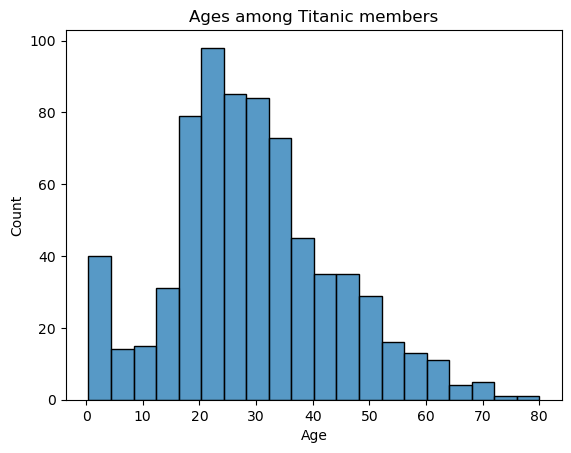

In [6]:
# For visualization, use Seaborn

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(titanic['Age'])
plt.title("Ages among Titanic members")
plt.show()

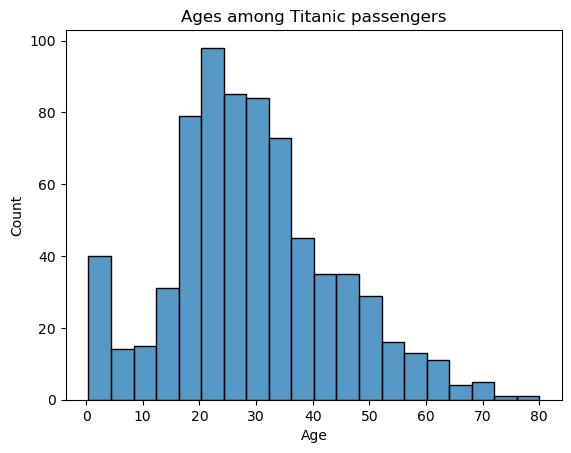

In [23]:
titanic.isnull().sum()

sns.histplot(titanic['Age'])
plt.title("Ages among Titanic passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

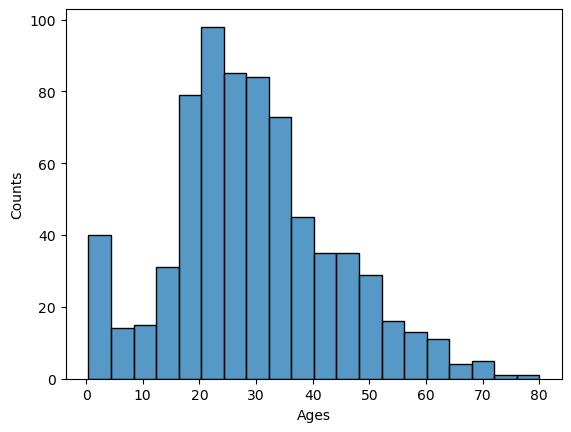

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
sns.histplot(titanic['Age'])
plt.xlabel("Ages")
plt.ylabel("Counts")
plt.show()

titanic.isnull().sum()

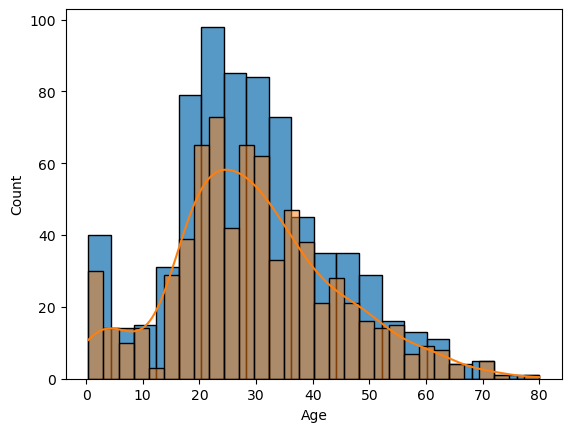

In [43]:
sns.histplot(titanic['Age'])
sns.histplot(titanic['Age'].dropna(), bins=30, kde = True)
plt.show()